### Week 3: The Naive Bayes classifier - Bernoulli model

Instructor: Cornelia Ilin <br>
Email: cilin@ischool.berkeley.edu <br>

### Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

### Step 2: Define working directories

### Step 3: Define classes

### Step 3: Define functions

---
### Step 5: Read data
---

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['class_label', 'alcohol', 'malic_acid', 'ash',
              'alcalinity_of_ash', 'magnesium', 'total_pphenols',
              'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
              'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines',
              'proline']

print('Shape of df wine:', df.shape)
print('Class labels:', df['class_label'].unique())
print()
df.head()

Shape of df wine: (178, 14)
Class labels: [1 2 3]



,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_pphenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


---
### Step 6: Data preprocessing (a.k.a., data cleaning)
---

#### Step 6.1 Data subseting

Today we will only be working with all class labels but only four features ['acohol', 'malic_acid', 'ash', 'flavanoids'].

In [3]:
labels = ['class_label']
features = ['alcohol', 'malic_acid', 'ash', 'color_intensity']
df = df[labels+features]
df.head()

,class_label,alcohol,malic_acid,ash,color_intensity
0,1,14.23,1.71,2.43,5.64
1,1,13.20,1.78,2.14,4.38
2,1,13.16,2.36,2.67,5.68
3,1,14.37,1.95,2.50,7.80
4,1,13.24,2.59,2.87,4.32


In [4]:
# create X and y arrays
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
X.head()

,alcohol,malic_acid,ash,color_intensity
0,14.23,1.71,2.43,5.64
1,13.20,1.78,2.14,4.38
2,13.16,2.36,2.67,5.68
3,14.37,1.95,2.50,7.80
4,13.24,2.59,2.87,4.32


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class_label, dtype: int64

Notice that the feature values are real valued. Let's look at histograms of each features.

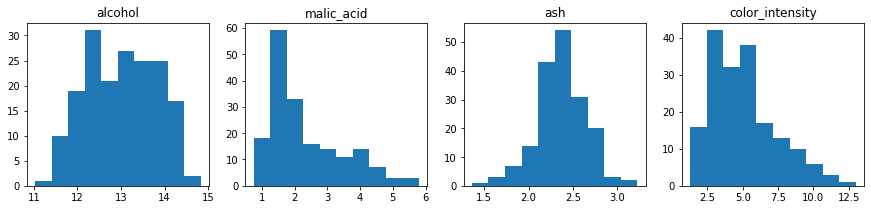

In [7]:
# Create a new figure and set the figsize argument so we get square-ish plots of the 4 features.
plt.figure(figsize=(15, 3))

# Iterate over the features, creating a subplot with a histogram for each one.
for idx, feature in enumerate(features):
    plt.subplot(1, 4, idx+1)
    X[feature].hist(bins=10, grid=False)
    plt.title(feature)

#### Step 6.2 Binarize feature values

To make things simple, let's binarize these feature values. That is, we'll treat each measurement as either "low" or "high". I'm just going to choose a threshold for each feature.

In [8]:
for feature in features:
    X[feature] = np.where(X[feature] >= X[feature].mean(), 1, 0)
X.head()

,alcohol,malic_acid,ash,color_intensity
0,1,0,1,1
1,1,0,0,0
2,1,1,1,1
3,1,0,1,1
4,1,1,1,0


#### Step 6.3 Split data into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1, stratify=y)

train_df = pd.concat((y_train, X_train), axis=1)
train_df.head()

,class_label,alcohol,malic_acid,ash,color_intensity
157,3,0,1,1,1
122,2,0,1,1,0
2,1,1,1,1,1
107,2,0,0,0,0
72,2,1,0,0,0


In [10]:
print('Class labels:', train_df.class_label.unique())
train_df.shape

Class labels: [3 2 1]


(133, 5)

#### Step 6.4 Compute stats needed for Bayes' probabilities

##### Step 6.4.1 Compute feature = 0 frequency (apply count() by column)

needed to compute conditional probabilities

In [11]:
# compute feature = 0 frequency  
feature0_count = pd.DataFrame()

for feature in features:
    temp_train_df = train_df[['class_label', feature]]
    temp_train_df = temp_train_df[train_df[feature]==0]
    temp_count = temp_train_df.groupby(['class_label']).count()
    feature0_count = pd.concat([feature0_count, temp_count], axis=1)

feature0_count

,alcohol,malic_acid,ash,color_intensity
class_label,,,,
1,2,37,16,17
2,49,39,34,51
3,13,4,17,8


##### Step 6.4.2 Compute feature = 1 frequency (apply count() by column)

Note that it sufficies to compute only feature = 0 frequency. Why?

In [12]:
# compute feature = 1 frequency
feature1_count = pd.DataFrame()

for feature in features:
    temp_train_df = train_df[['class_label', feature]]
    temp_train_df = temp_train_df[train_df[feature]==1]
    temp_count = temp_train_df.groupby(['class_label']).count()
    feature1_count = pd.concat([feature1_count, temp_count], axis=1)

feature1_count

,alcohol,malic_acid,ash,color_intensity
class_label,,,,
1,42,7,28,27
2,4,14,19,2
3,23,32,19,28


In [13]:
# As a sanity check/, what should the total sum of all counts (feature0_count + feature1_count) be?
# We have 133 training examples, each with 4 features. So we should have counted 532 things.
print(feature0_count.sum() + feature1_count.sum())

print('\ntrain_df.shape: ', train_df.iloc[:, 1:].shape)
print('Total count: ', train_df.iloc[:,1:].shape[0] * train_df.iloc[:,1:].shape[1])

alcohol            133
malic_acid         133
ash                133
color_intensity    133
dtype: int64

train_df.shape:  (133, 4)
Total count:  532


#### Step 6.4.5 compute number of y_train, y_train=1, y_train=2, y_train=3

In [14]:
count_y_train_all = train_df['class_label'].count()
count_y_train_1 = train_df[train_df.class_label==1]['class_label'].count()
count_y_train_2 = train_df[train_df.class_label==2]['class_label'].count()
count_y_train_3 = train_df[train_df.class_label==3]['class_label'].count()
count_y_train = pd.Series(np.array([count_y_train_1, count_y_train_2, count_y_train_3]), index= [1,2,3])

print('count_y_train_all: ', count_y_train_all)
print('count_y_train_1: ', count_y_train_1)
print('count_y_train_2: ', count_y_train_2)
print('count_y_train_3: ', count_y_train_3)

count_y_train_all:  133
count_y_train_1:  44
count_y_train_2:  53
count_y_train_3:  36


---
### Step 7: Analysis - Naive Bayes as a classification algorithm
---

#### Step 7.1 Compute conditional probabilities

In [15]:
# compute conditional probability for each feature=0
cond_prob0 = feature0_count.apply(lambda x: x/count_y_train)
cond_prob0

# add conditional probability for all feature=0
cond_prob0['cond_prob0'] = cond_prob0.apply(lambda x: x.alcohol * x.malic_acid * x.ash * x.color_intensity, axis=1)
cond_prob0

,alcohol,malic_acid,ash,color_intensity,cond_prob0
class_label,,,,,
1,0.045455,0.840909,0.363636,0.386364,0.005370
2,0.924528,0.735849,0.641509,0.962264,0.419958
3,0.361111,0.111111,0.472222,0.222222,0.004210


In [16]:
# compute conditional probability for each feature=1
cond_prob1 = feature1_count.apply(lambda x: x/count_y_train)
cond_prob1

# add conditional probability for all feature=1
cond_prob1['cond_prob1'] = cond_prob1.apply(lambda x: x.alcohol * x.malic_acid * x.ash * x.color_intensity, axis=1)
cond_prob1

,alcohol,malic_acid,ash,color_intensity,cond_prob1
class_label,,,,,
1,0.954545,0.159091,0.636364,0.613636,0.059301
2,0.075472,0.264151,0.358491,0.037736,0.000270
3,0.638889,0.888889,0.527778,0.777778,0.233120


In [17]:
# As a sanity check, which probabilities should sum to 1?
sum_cond_prob = cond_prob1 + cond_prob0
sum_cond_prob[features]

,alcohol,malic_acid,ash,color_intensity
class_label,,,,
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


#### Step 7.2 Compute prior probabilities

In [18]:
prior_1 = count_y_train_1/count_y_train_all
prior_2 = count_y_train_2/count_y_train_all
prior_3 = count_y_train_3/count_y_train_all
priors = pd.Series(np.array([prior_1, prior_2, prior_3]), index= [1,2,3])

print('P(class=1)=', prior_1)
print('P(class=2)=', prior_2)
print('P(class=3)=', prior_3)

# check to see if they add up to 1
print('sum prior probabilities:', prior_1 + prior_2 + prior_3)

P(class=1)= 0.3308270676691729
P(class=2)= 0.39849624060150374
P(class=3)= 0.2706766917293233
sum prior probabilities: 1.0


#### Step 7.3 Make a prediction for the first example

Now that we have all the pieces, let's try making a prediction for the first test example. It looks like this is a cultivar 1 (class_label=1) example. Alcohol and malic acid features have high values, and ash and color intensity features have low values.

We start by assuming the prior distribution, which has a slight preference for cultivar 2, followed by cultivar 1. Of course, these estimates come from our training data, which might not be a representative sample. In practice, we may prefer to use a uniform prior.

In [19]:
# What does the feature vector look like? And what's the true label?
index = 0
print ('Feature vector: \n', X_test.iloc[index, :])
print ('\nClass label: ', y_test[index])

# Start with the prior distribution over labels.
print ('\nPriors:\n', priors)

Feature vector: 
 alcohol            1
malic_acid         1
ash                0
color_intensity    0
Name: 43, dtype: int64

Class label:  1

Priors:
 1    0.330827
2    0.398496
3    0.270677
dtype: float64


Let's find the predicted label for this test example by accounting for the **alcohol feature** only.

In [20]:
# just as a reminder, print conditional probabilities for feature=1
cond_prob1

,alcohol,malic_acid,ash,color_intensity,cond_prob1
class_label,,,,,
1,0.954545,0.159091,0.636364,0.613636,0.059301
2,0.075472,0.264151,0.358491,0.037736,0.000270
3,0.638889,0.888889,0.527778,0.777778,0.233120


(a) Compute conditional probabilities * prior probabilities for each class

In [21]:
numerator = []

for class_label in range(len(priors)):
    numerator.append(cond_prob1['alcohol'].values[class_label] * priors.values[class_label])

print(numerator)

[0.3157894736842105, 0.03007518796992481, 0.17293233082706766]


(b) compute evidence

In [22]:
denominator = 0
for val in numerator:
    denominator += val

denominator

0.518796992481203

compute posterior probability

In [23]:
posterior_prob = list(numerator/denominator)
posterior_prob

[0.608695652173913, 0.05797101449275362, 0.3333333333333333]

So after accounting for the alcohol feature our updated belief is that the train obsetvation is part of cultivar 1.

Let's include the remaining features.

In [24]:
# compute conditional probabilities * prior probabilities
numerator = []

for class_label in range(len(priors)):
    numerator.append(cond_prob1['alcohol'].values[class_label] * cond_prob1['malic_acid'].values[class_label] *
                     priors.values[class_label])
    
numerator

[0.050239234449760764, 0.007944389275074477, 0.15371762740183792]

In [25]:
# compute evidence
denominator = 0
for val in numerator:
    denominator += val

denominator

0.21190125112667316

In [26]:
# compute posterior probability
posterior_prob = list(numerator/denominator)
posterior_prob

[0.23708795574655708, 0.03749099749451396, 0.7254210467589289]

So after accounting for all the feature our updated belief is that the train obsetvation is part of cultivar 3. It looks like Naive Bayes came up with the wrong answer.

#### Step 7.4 Make a prediction using sklearn

Now we can compare our implementation with the sklearn implementation. Do the predictions agree? 

In [27]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print('Predicted label for the first test example is: ', y_pred[0])
y_pred

Predicted label for the first test example is:  3


array([3, 3, 2, 2, 2, 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2,
       3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2,
       2])

Question: what's the role of alpha here?

Let's compute accuracy

In [28]:
print('Prediction accuracy: %3.2f' % bnb.score(X_test, y_test))

Prediction accuracy: 0.78


Let's compare our prior probabilities with sklearn's

In [29]:
print ('\nour prior probabilities:\n', list(priors))
print ('\nsklearn prior probabilities:\n', np.exp(bnb.class_log_prior_))


our prior probabilities:
 [0.3308270676691729, 0.39849624060150374, 0.2706766917293233]

sklearn prior probabilities:
 [0.33082707 0.39849624 0.27067669]


Let's compare our conditional probabilities for feature=1 with sklearn's

In [30]:
print ('\nOur conditional probabilities\n', cond_prob1.loc[:,features])
print ('\nsklearn conditional probabilities\n', np.exp(bnb.feature_log_prob_))


Our conditional probabilities
               alcohol  malic_acid       ash  color_intensity
class_label                                                 
1            0.954545    0.159091  0.636364         0.613636
2            0.075472    0.264151  0.358491         0.037736
3            0.638889    0.888889  0.527778         0.777778

sklearn conditional probabilities
 [[0.93478261 0.17391304 0.63043478 0.60869565]
 [0.09090909 0.27272727 0.36363636 0.05454545]
 [0.63157895 0.86842105 0.52631579 0.76315789]]
